In [40]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.layers import *
from keras import models
model = models.Sequential()
from keras.preprocessing import image

In [41]:
from tensorflow.keras.applications import InceptionV3
conv_base = InceptionV3(weights='imagenet',
                              include_top=False,
                              input_shape=(224, 224, 3))

In [42]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(Dropout(0.25))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(layers.Dense(1, activation='sigmoid'))

In [43]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 dropout_8 (Dropout)         (None, 5, 5, 2048)        0         
                                                                 
 flatten_4 (Flatten)         (None, 51200)             0         
                                                                 
 dense_12 (Dense)            (None, 256)               13107456  
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 1)               

In [44]:
"""model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])"""

'model.compile(optimizer="rmsprop",\n loss="binary_crossentropy",\n metrics=["accuracy"])'

In [47]:
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])

In [48]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory("/content/drive/MyDrive/computer_vision/preprocess_data/train",
                                            image_size=(224,224), batch_size=32)

Found 4190 files belonging to 2 classes.


In [49]:
val_dataset = image_dataset_from_directory("/content/drive/MyDrive/computer_vision/preprocess_data/val",
                                             image_size=(224, 224),batch_size=32)

Found 1196 files belonging to 2 classes.


In [50]:

history = model.fit(
train_dataset,validation_data = val_dataset, epochs=10)

Epoch 1/10
131/131 [==============================] - 53s 305ms/step - loss: 0.9406 - accuracy: 0.8033 - val_loss: 7.1627 - val_accuracy: 0.7742
Epoch 2/10
131/131 [==============================] - 39s 290ms/step - loss: 0.1620 - accuracy: 0.9685 - val_loss: 783.1476 - val_accuracy: 0.8938
Epoch 3/10
131/131 [==============================] - 39s 291ms/step - loss: 0.1207 - accuracy: 0.9764 - val_loss: 8136.1104 - val_accuracy: 0.5485
Epoch 4/10
131/131 [==============================] - 38s 289ms/step - loss: 0.2514 - accuracy: 0.9699 - val_loss: 0.3746 - val_accuracy: 0.9691
Epoch 5/10
131/131 [==============================] - 38s 289ms/step - loss: 0.1174 - accuracy: 0.9785 - val_loss: 17.2603 - val_accuracy: 0.8219
Epoch 6/10
131/131 [==============================] - 38s 290ms/step - loss: 0.0996 - accuracy: 0.9823 - val_loss: 0.1722 - val_accuracy: 0.9791
Epoch 7/10
131/131 [==============================] - 42s 313ms/step - loss: 0.0806 - accuracy: 0.9842 - val_loss: 1.0643 - 

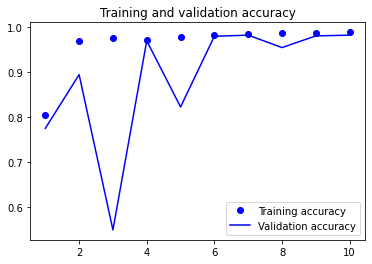

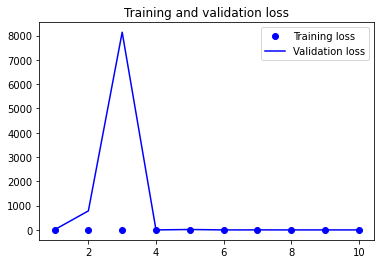

In [53]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


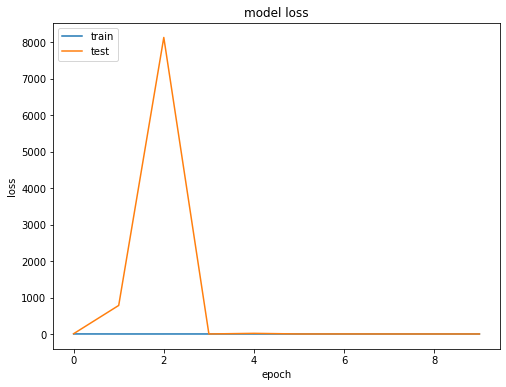

In [55]:
print(history.history.keys())

import matplotlib.pylab as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

       loss  accuracy     val_loss  val_accuracy
0  0.940606  0.803341     7.162652      0.774247
1  0.162030  0.968496   783.147583      0.893813
2  0.120710  0.976372  8136.110352      0.548495
3  0.251380  0.969928     0.374619      0.969064
4  0.117354  0.978520    17.260260      0.821906
5  0.099607  0.982339     0.172236      0.979097
6  0.080616  0.984248     1.064344      0.981605
7  0.073135  0.986158     0.133243      0.954013
8  0.101533  0.985442     0.091439      0.979933
9  0.066653  0.988067     0.063354      0.981605


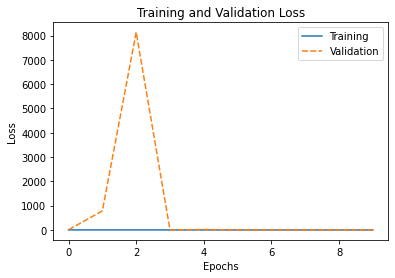

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Create pandas DataFrame
df_history = pd.DataFrame(history.history)
print(df_history)
 
# Plot using Seaborn
my_plot = sns.lineplot(data=df_history[["loss","val_loss"]])
my_plot.set_xlabel('Epochs')
my_plot.set_ylabel('Loss')
plt.legend(labels=["Training", "Validation"])
plt.title('Training and Validation Loss')
plt.show()

In [56]:
model.save('mask_classification.h5')

In [57]:
test_dataset = image_dataset_from_directory("/content/drive/MyDrive/computer_vision/preprocess_data/test",
                                             image_size=(224, 224),batch_size=32)

Found 602 files belonging to 2 classes.


In [58]:
model.evaluate(test_dataset)

19/19 [==============================] - 2s 89ms/step - loss: 0.0199 - accuracy: 0.9917


[0.019853319972753525, 0.9916943311691284]